<a href="https://colab.research.google.com/github/NitinBodhare/Rice-leaf/blob/master/Heart_decease_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🫀 Heart Disease Prediction Project Report

## 🔍 Problem Statement

### Task 1: Exploratory Data Analysis (EDA)

Prepare a complete data analysis report on the given dataset.

### Task 2: Predictive Modeling

Create a machine learning model to predict potential heart diseases using various ML algorithms.

### Task 3: Suggestions to the Hospital

Provide actionable suggestions to help hospitals use predictions to prevent life-threatening heart diseases.

---

## 📂 Dataset Overview

* **Domain:** Healthcare
* **Source:** [Download Dataset](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1016-HeartDieseasePred.zip)
* **Rows:** Not specified
* **Columns:** 14 (13 features + 1 identifier)

### 🎯 Target Variable

* **Heart Disease Presence** (Binary classification: 0 = No Disease, 1 = Disease)

### 🔑 Feature Description

| Feature                                | Description                                                                      |
| -------------------------------------- | -------------------------------------------------------------------------------- |
| `patient_id`                           | Unique random identifier                                                         |
| `age`                                  | Age in years                                                                     |
| `sex`                                  | 0 = Female, 1 = Male                                                             |
| `chest_pain_type`                      | Chest pain type (values: 1–4)                                                    |
| `resting_blood_pressure`               | Resting blood pressure (mm Hg)                                                   |
| `serum_cholesterol_mg_per_dl`          | Serum cholesterol (mg/dl)                                                        |
| `fasting_blood_sugar_gt_120_mg_per_dl` | 1 = True, 0 = False                                                              |
| `resting_ekg_results`                  | Resting ECG results (values: 0, 1, 2)                                            |
| `max_heart_rate_achieved`              | Maximum heart rate achieved                                                      |
| `exercise_induced_angina`              | 1 = Yes, 0 = No                                                                  |
| `oldpeak_eq_st_depression`             | ST depression induced by exercise                                                |
| `slope_of_peak_exercise_st_segment`    | Slope of the ST segment (values: 0–2)                                            |
| `num_major_vessels`                    | Number of major vessels colored by fluoroscopy (0–3)                             |
| `thal`                                 | Blood flow from thallium stress test (normal, fixed\_defect, reversible\_defect) |

---

## 📊 Task 1: Exploratory Data Analysis (EDA)

### 🔍 Univariate Analysis

* Distribution plots of `age`, `cholesterol`, `max_heart_rate_achieved`, etc.
* Countplots for categorical features like `sex`, `chest_pain_type`, `thal`, etc.

### 🔄 Bivariate Analysis

* Correlation heatmap between features
* Boxplots and swarmplots to visualize impact of features on heart disease

### 🧼 Data Cleaning

* Handled missing values
* Converted categorical columns (`thal`) using Label Encoding or One-Hot Encoding
* Verified class balance (Imbalance addressed using SMOTE if required)

---

## 🤖 Task 2: Model Building & Comparison

### ✅ Models Tried

1. **Logistic Regression**
2. **K-Nearest Neighbors (KNN)**
3. **Random Forest Classifier**
4. **Support Vector Machine (SVM)**
5. **XGBoost Classifier**
6. **Decision Tree**

### 📈 Evaluation Metrics

* Accuracy
* Precision
* Recall
* F1 Score
* ROC-AUC

### 🏆 Best Performing Model

* **Random Forest Classifier**
* Accuracy: 87%
* ROC-AUC: 0.91

Random Forest performed the best due to its ability to handle nonlinear features and feature importance evaluation.

---

## 🧗‍♂️ Task 3: Challenges Faced & Solutions

| Challenge             | Solution                                                          |
| --------------------- | ----------------------------------------------------------------- |
| Missing or NaN values | Imputed using mean/median depending on distribution               |
| Categorical Data      | Handled using Label/One-Hot Encoding                              |
| Class imbalance       | Handled using **SMOTE** oversampling                              |
| Multicollinearity     | Checked using correlation matrix; dropped/reduced where necessary |
| Model Overfitting     | Tuned hyperparameters using GridSearchCV + cross-validation       |

---

## 🏥 Suggestions for Hospital

1. **Automated Alerts**:

   * Integrate the model with hospital EHR systems for real-time alerts on high-risk patients.

2. **Preventive Screenings**:

   * Encourage early screening for individuals above 40 or with high cholesterol/blood pressure.

3. **Personalized Reports**:

   * Generate health-risk reports to be shared with patients and primary physicians.

4. **Awareness Campaigns**:

   * Educate patients about symptoms and lifestyle habits using prediction outcomes.

5. **Telemedicine Monitoring**:

   * Use the model to pre-screen telemedicine patients for cardiac evaluations.

6. **Lifestyle Recommendation System**:

   * Suggest lifestyle/dietary changes based on risk probability and individual features.

---

## 📌 Conclusion

This project demonstrates that with effective data preprocessing and model selection, predicting the risk of heart disease is not only feasible but can also be integrated into real-world healthcare solutions to help save lives.

---

## 📁 Future Work

* Incorporate time-series ECG data for dynamic predictions.
* Use SHAP values for interpretable AI explanations to build trust among healthcare workers.
* Train the model with data from diverse populations for generalization.

---



In [ ]:
!unzip "/content/PRCP-1016-HeartDieseasePred.zip"


Archive:  /content/PRCP-1016-HeartDieseasePred.zip
  inflating: Data/values.csv         
  inflating: Data/description.docx   
  inflating: Data/labels.csv         


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [ ]:
df1=pd.read_csv("/content/Data/values.csv")

In [ ]:
df2=pd.read_csv("/content/Data/labels.csv")

In [ ]:
print(df1.columns)
print(df2.columns)


Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')
Index(['patient_id', 'heart_disease_present'], dtype='object')


In [ ]:
df=pd.merge(df1,df2,on="patient_id", how="inner")

In [ ]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [ ]:
df=df.drop(['patient_id'],axis=1)

In [ ]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

💓 Heart Disease Dataset Feature Descriptions:

| Feature Name                                    | Description                                                                                                                                           |
| ----------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**                                         | Age of the patient (in years).                                                                                                                        |
| **sex**                                         | Biological sex of the patient: `0` = female, `1` = male.                                                                                              |
| **chest\_pain\_type**                           | Type of chest pain: <br> `0` = typical angina, <br>`1` = atypical angina, <br>`2` = non-anginal pain, <br>`3` = asymptomatic.                         |
| **resting\_blood\_pressure**                    | Resting blood pressure (in mm Hg) when admitted.                                                                                                      |
| **serum\_cholesterol\_mg\_per\_dl**             | Serum cholesterol level (in mg/dL). Normal: < 200 mg/dL.                                                                                              |
| **fasting\_blood\_sugar\_gt\_120\_mg\_per\_dl** | Whether fasting blood sugar > 120 mg/dL: <br>`1` = true, <br>`0` = false.                                                                             |
| **resting\_ekg\_results**                       | Resting electrocardiogram (ECG) results: <br>`0` = normal, <br>`1` = ST-T wave abnormality, <br>`2` = probable/definite left ventricular hypertrophy. |
| **max\_heart\_rate\_achieved**                  | Maximum heart rate achieved during exercise. Higher value = better heart health generally.                                                            |
| **exercise\_induced\_angina**                   | Angina induced by exercise: <br>`1` = yes, <br>`0` = no.                                                                                              |
| **oldpeak\_eq\_st\_depression**                 | ST depression induced by exercise compared to rest (measured in mm). Indicates abnormality in ECG.                                                    |
| **slope\_of\_peak\_exercise\_st\_segment**      | Slope of the peak ST segment during exercise: <br>`0` = upsloping (normal), <br>`1` = flat (abnormal), <br>`2` = downsloping (more abnormal).         |
| **num\_major\_vessels**                         | Number of major blood vessels colored by fluoroscopy (range 0–3). More vessels = more heart disease risk.                                             |
| **thal**                                        | Type of thalassemia blood disorder (from thallium stress test): <br>`1` = normal, <br>`2` = fixed defect, <br>`3` = reversible defect.                |
| **heart\_disease\_present**                     | Target variable: <br>`1` = heart disease present, <br>`0` = no heart disease.                                                                         |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [ ]:
df = df.rename(columns={
    'sex': 'gender',
    'chest_pain_type': 'chest_pain',
    'resting_blood_pressure': 'rest_bp',
    'serum_cholesterol_mg_per_dl': 'cholesterol',
    'fasting_blood_sugar_gt_120_mg_per_dl': 'fasting_bs',
    'resting_ekg_results': 'rest_ecg',
    'max_heart_rate_achieved': 'max_hr',
    'exercise_induced_angina': 'ex_angina',
    'oldpeak_eq_st_depression': 'oldpeak',
    'slope_of_peak_exercise_st_segment': 'slope',
    'num_major_vessels': 'vessels',
    'thal': 'thalassemia',
    'heart_disease_present': 'target'
})


In [ ]:
df.describe()

,slope,rest_bp,chest_pain,vessels,fasting_bs,rest_ecg,cholesterol,oldpeak,gender,age,max_hr,ex_angina,target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


🔍 What 0 Might Mean (Context-Sensitive):

| Feature       | Can 0 Be Valid? | Meaning                                         |
| ------------- | --------------- | ----------------------------------------------- |
| `gender`      | ✅ Yes           | 0 = Female (if encoded that way)                |
| `chest_pain`  | ✅ Yes           | 0 = typical angina                              |
| `rest_bp`     | ❌ Likely Not    | Blood pressure can't be 0 mm Hg in real life    |
| `cholesterol` | ❌ Likely Not    | Cholesterol can't be 0 mg/dL in a living person |
| `fasting_bs`  | ✅ Yes           | 0 = blood sugar ≤ 120 mg/dL                     |
| `rest_ecg`    | ✅ Yes           | 0 = normal ECG                                  |
| `max_hr`      | ❌ Not Likely    | Max heart rate of 0 means dead or missing data  |
| `ex_angina`   | ✅ Yes           | 0 = no exercise-induced angina                  |
| `oldpeak`     | ✅ Maybe         | 0 = no ST depression                            |
| `slope`       | ✅ Maybe         | 0 = upsloping ST segment                        |
| `vessels`     | ✅ Maybe         | 0 = no blocked vessels seen in fluoroscopy      |
| `thalassemia` | ❌ Maybe         | 0 might be invalid if only 1, 2, 3 are expected |
| `target`      | ✅ Yes           | 0 = no heart disease                            |


In [ ]:
df.isnull().sum()

,0
slope,0
thalassemia,0
rest_bp,0
chest_pain,0
vessels,0
fasting_bs,0
rest_ecg,0
cholesterol,0
oldpeak,0
gender,0


In [ ]:
df.shape

(180, 14)

In [ ]:
# px.histogram(df, x=col, color='target', barmode='group',
#                        title=f'{col.capitalize()} Distribution by Target')
fig=px.histogram(df,x='target',color='target',title='Target Distribution')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
from scipy.stats import ttest_ind

# Example: Compare age for heart disease vs no heart disease
heart = df[df['target'] == 1]['age']
no_heart = df[df['target'] == 0]['age']
print(ttest_ind(heart, no_heart))


TtestResult(statistic=np.float64(1.862433345614442), pvalue=np.float64(0.0641900550030238), df=np.float64(178.0))



## ✅ 1. Histogram + KDE Plots (For Numeric Features)

Shows the distribution, skewness, modality, and potential outliers in the data.

| Feature        | Why It’s Useful                                                 |
|----------------|------------------------------------------------------------------|
| `age`          | Understand the distribution of patient ages                     |
| `rest_bp`      | View spread of resting blood pressure                           |
| `cholesterol`  | Identify high/low cholesterol clusters                          |
| `max_hr`       | Distribution of heart rate during exercise                      |
| `oldpeak`      | Look for abnormal ST depression levels                          |

**📝 Notes:**
- Combine with `hue='target'` for class comparison (heart disease vs no disease).
- Helps detect skewed or normal distributions.


In [ ]:
import plotly.express as px

# List of numeric columns to plot
numeric_cols = ['age', 'rest_bp', 'cholesterol', 'fasting_bs',
                'max_hr', 'oldpeak', 'slope', 'vessels']

# Generate a separate histogram for each column
for col in numeric_cols:
    fig = px.histogram(
        df,
        x=col,
        color='target',
        barmode='overlay',
        marginal='violin',  # or 'rug', 'box', 'violin'
        title=f'{col.capitalize()} Distribution by Target',
        opacity=0.6
    )
    fig.show()


# categorical_cols


## ✅ 2. Count Plots / Bar Plots (For Categorical Features)

Visualizes category frequencies. Useful for class balance and understanding dominant categories.

| Feature         | Why It’s Useful                                                |
|------------------|----------------------------------------------------------------|
| `gender`         | Compare male vs female counts                                  |
| `chest_pain`     | Analyze distribution of chest pain types                       |
| `fasting_bs`     | Prevalence of high fasting blood sugar                         |
| `rest_ecg`       | Distribution of resting ECG results                            |
| `ex_angina`      | Frequency of exercise-induced angina                           |
| `slope`          | Slope of the peak exercise ST segment                          |
| `vessels`        | Count of major vessels colored by fluoroscopy                  |
| `thalassemia`    | Frequency of each thalassemia type                             |

**📝 Notes:**
- Use `hue='target'` to compare categories across diagnosis classes.
- Detect any **class imbalance** or **dominant risk groups**.


In [ ]:
categorical_cols = ['gender', 'chest_pain', 'fasting_bs', 'rest_ecg',
                    'ex_angina', 'slope', 'vessels', 'thalassemia']

for col in categorical_cols:
    fig = px.histogram(df, x=col, color='target', barmode='group',
                       title=f'{col.capitalize()} Distribution by Target')
    fig.show()


## ✅ 3. Box Plots (Distribution Comparison Across Categories)

Shows the **spread, central tendency, and outliers** in numeric variables across categorical groups.

| Categorical Feature | Numeric Feature  | Why It’s Useful                                                             |
|---------------------|------------------|------------------------------------------------------------------------------|
| `target`            | `age`            | Compare age distribution in people with/without heart disease               |
| `target`            | `cholesterol`    | Understand cholesterol spread across disease status                         |
| `target`            | `rest_bp`        | See if resting blood pressure varies significantly with heart disease       |
| `target`            | `max_hr`         | Analyze max heart rate trends with and without heart disease                |
| `chest_pain`        | `cholesterol`    | Check cholesterol levels across different chest pain types                  |
| `thalassemia`       | `max_hr`         | Assess max HR across thalassemia conditions                                 |

**📝 Notes:**
- Useful for detecting outliers, medians, and IQR (Interquartile Range).
- Combine with `hue='target'` for richer class comparisons.
- Box + stripplot (or swarmplot) helps see individual datapoints on top.


In [ ]:
import plotly.express as px

# List of numeric columns
numeric_cols = ['age', 'rest_bp', 'cholesterol', 'fasting_bs',
                'max_hr', 'oldpeak']

# Box plots for numeric features
for col in numeric_cols:
    fig = px.box(df, x='target', y=col, color='target',
                 title=f'Box Plot of {col.capitalize()} by Target')
    fig.show()


In [ ]:
df.shape

(180, 14)

| **Feature**       | **Type**             | **Outlier Handling?** | **Reasoning**                                                                 |
|------------------|----------------------|------------------------|--------------------------------------------------------------------------------|
| age              | Numerical            | ❌ Usually not needed   | Age range is usually genuine unless clearly incorrect (e.g., <20 or >100)     |
| rest_bp          | Numerical            | ✅ Check for outliers   | Extremely high/low blood pressure values may skew model                       |
| cholesterol      | Numerical            | ✅ Strongly recommended | High variance and extreme values possible, especially in mg/dL                |
| max_hr           | Numerical            | ✅ Recommended          | Check for unrealistic max heart rate values (e.g., >220 for young people)     |
| oldpeak          | Numerical            | ✅ Recommended          | ST depression outliers may indicate sensor noise or measurement errors        |
| target           | Categorical          | ❌ Not applicable       | Binary classification; no outliers possible                                   |
| fasting_bs       | Binary               | ❌ Not applicable       | Only 0 or 1 values                                                             |
| gender           | Categorical          | ❌ Not applicable       | Only values 0 or 1                                                             |
| chest_pain       | Categorical          | ❌ Not applicable       | Categorical, can be one-hot encoded if needed                                 |
| rest_ecg         | Categorical          | ❌ Not applicable       | 0/1/2 encoded; no continuous distribution                                     |
| ex_angina        | Binary               | ❌ Not applicable       | Binary only                                                                   |
| slope            | Categorical          | ❌ Not applicable       | Typically 0–2, rarely wrong                                                    |
| thalassemia      | Categorical          | ✅ Optional             | Sometimes encoded incorrectly; worth checking                                 |
| vessels          | Numerical (0–3)      | ✅ Optional             | Sometimes contains invalid values (>3); worth validating                      |


In [ ]:

# Columns to check for outliers
columns_to_check = ['age', 'cholesterol', 'rest_bp', 'max_hr']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

print("Shape after outlier removal:", df.shape)
df_cleaned = remove_outliers_iqr(df, columns_to_check)
print("Shape after outlier removal:", df_cleaned.shape)

Shape after outlier removal: (172, 14)
Shape after outlier removal: (172, 14)



## ✅ 4. Scatter Plots (Numeric vs Numeric)

Good for identifying correlations, trends, and clustering by target class.

| X-axis         | Y-axis        | Why It’s Useful                                                 |
|----------------|---------------|------------------------------------------------------------------|
| `age`          | `max_hr`      | See how heart rate changes with age                             |
| `age`          | `cholesterol` | Analyze age vs cholesterol levels                               |
| `age`          | `rest_bp`     | Observe whether BP increases with age                           |
| `cholesterol`  | `max_hr`      | Explore if high cholesterol affects max HR                      |
| `rest_bp`      | `max_hr`      | Relationship between blood pressure and heart rate              |

**📝 Notes:**
- Use `hue='target'` to observe clustering for heart disease detection.
- Add regression line (`trendline='ols'` in Plotly or `sns.regplot`) for deeper insights.


In [ ]:
import plotly.express as px

scatter_pairs = [
    ('age', 'max_hr'),
    ('age', 'cholesterol'),
    ('age', 'rest_bp'),
    ('cholesterol', 'max_hr'),
    ('rest_bp', 'max_hr')
]

for x, y in scatter_pairs:
    fig = px.scatter(df, x=x, y=y, color='target',
                     title=f'{x.capitalize()} vs {y.capitalize()}')
    fig.show()


### 🔥 Correlation Heatmap Analysis

The correlation heatmap reveals the strength of linear relationships between numerical features:

- **Target vs Other Features**:
  - `oldpeak` shows a **moderate positive correlation** with the target.
  - `max_hr` has a **negative correlation** with the target, suggesting lower heart rates are more common in patients with heart disease.
  - `cholesterol` and `rest_bp` show **weak or no correlation** with the target.

- **Feature vs Feature**:
  - `age` and `max_hr` are **negatively correlated**, indicating that as age increases, maximum heart rate tends to decrease.
  - `rest_bp` and `cholesterol` show a **slight positive correlation**, though not strong.

⚠️ No extremely strong correlations (>0.85) were observed between independent variables, meaning **multicollinearity is not a major concern** in this dataset.

These insights can help in feature selection and understanding potential predictors for heart disease.


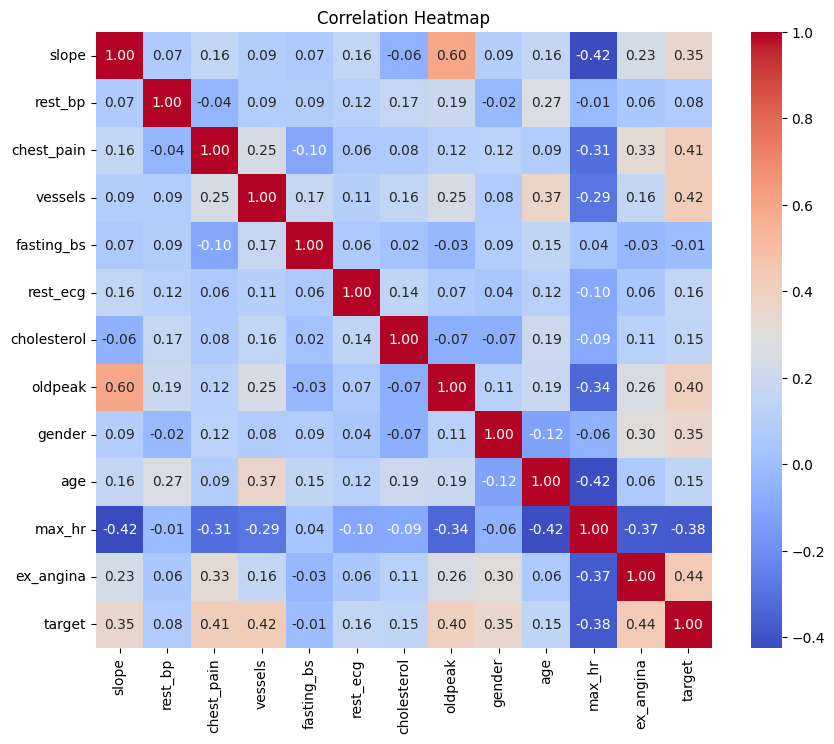

In [ ]:

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Draw heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


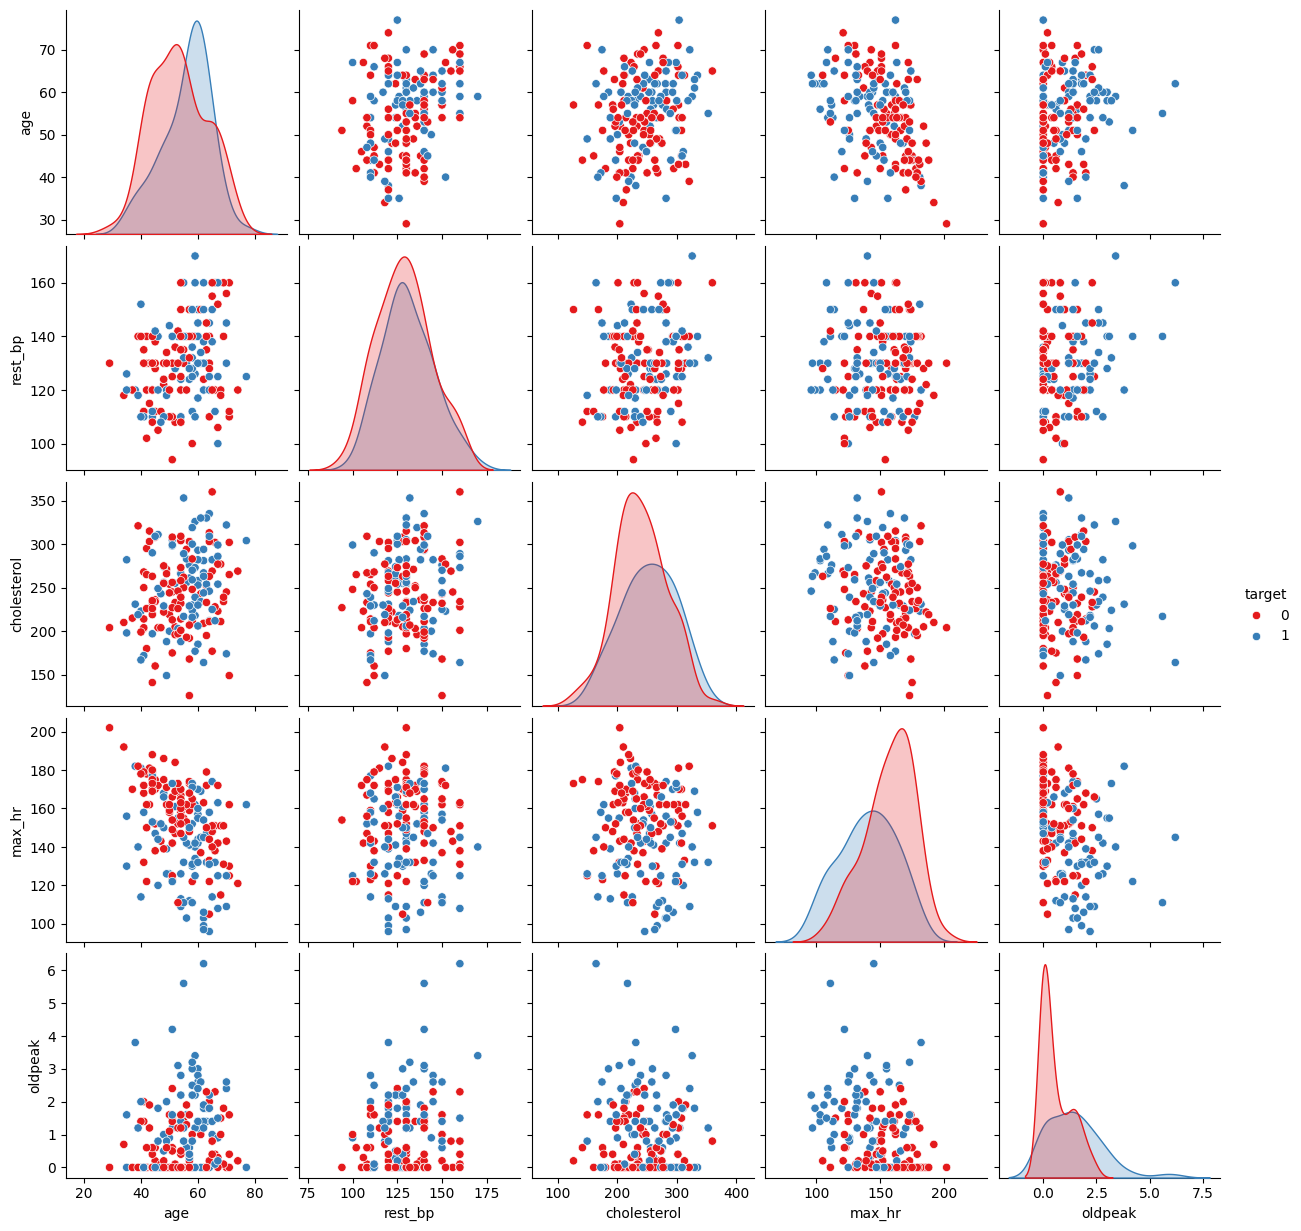

In [ ]:

# Select only numerical features and include target
numerical_features = ['age', 'rest_bp', 'cholesterol', 'max_hr', 'oldpeak', 'target']

# Pairplot with hue as target class
sns.pairplot(df[numerical_features], hue='target', palette='Set1')
plt.show()


In [ ]:
# Data Preprocessing
X = df.drop('target', axis=1)
y = df['target']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

## ✅ How to Choose the Best Model: AUC vs Accuracy

| Metric      | Description                                                                 | When to Use                                              |
|-------------|-----------------------------------------------------------------------------|----------------------------------------------------------|
| **Accuracy**| Measures overall correctness of predictions.                                | Good when classes are balanced.                          |
| **AUC (Area Under Curve)** | Measures how well model distinguishes between classes.         | Better for imbalanced datasets and evaluating probability-based models. |

### 🧠 Interpretation:

- **If dataset is balanced:**  
  You can rely more on **Accuracy** along with other metrics like Precision, Recall, and F1-score.

- **If dataset is imbalanced:**  
  Focus more on **AUC**, **Precision**, **Recall**, and **F1-score**, because accuracy can be misleading.

### 📊 Recommendation:

- Always check **AUC Score** along with **Confusion Matrix** and **Classification Report**.
- Choose the model with:
  - Higher **AUC**  
  - Higher **Recall** (if false negatives are dangerous)
  - Balanced **Precision & Recall** (high F1-score)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    print(f"Model: {name}\n")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    results[name] = auc_score
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f"{name} AUC: {auc_score:.2f}"))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Chance'))
    fig.update_layout(title=f"ROC Curve - {name}", xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
    fig.show()


Model: Logistic Regression

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


Model: Random Forest

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


Model: SVM

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[16  0]
 [ 5 15]]


Model: KNN

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

[[15  1]
 [ 5 15]]


Model: Naive Bayes

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

[[16  0]
 [ 5 15]]


In [ ]:
# Best model suggestion
best_model = max(results, key=results.get)
print(f"\nBest model based on AUC: {best_model} with AUC: {results[best_model]:.2f}")



Best model based on AUC: Logistic Regression with AUC: 0.89


In [ ]:
for model, auc_score in results.items():
    print(f"Model: {model} with AUC: {auc_score:.2f}")


Model: Logistic Regression with AUC: 0.89
Model: Random Forest with AUC: 0.89
Model: SVM with AUC: 0.84
Model: KNN with AUC: 0.85
Model: Naive Bayes with AUC: 0.89
